# PROGRAMMING FOR DATA ANALYSIS PROJECT

In [ ]:
#### Sources

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 
http://www3.dsi.uminho.pt/pcortez/student.pdf
 These two sources were very useful.  I found my dataset in the first source and used the second to find out how the Cortez & Silva
study related to predicting success in education by examining variables in the students' lives.

http://uis.unesco.org/country/PT
    Provides data of population of Portugal broken down by age.
    
https://www.oecd-ilibrary.org/docserver/9789264117020-4-en.pdf
    Provided me with information about Portugese school system.
   
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
    This source helped me to tidy up the dataset into the columns and rows I wanted to keep.

https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
    This source helped me to find a way to display all the data in the dataset.
    
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/
    This source was very useful with appropriate functions to interpret the data.

I predict there is a link between the variables; school attendance, mother's education, father's education, plans to attend 
higher education and achievement.  I will use the dataset produced by Cortez and Silva which includes these variables among others.
First I will import the dataset and eliminate the other variables until I have the ones I want to investigate.  

In [ ]:
import pandas as pd

# The dataset was in a zipped file so I had to unzip it, save it to my local machine and then read the filename into
# Jupyter.  The file was not saved using commas as delimiters so I added the parameter delimiter = ; so Pandas could
# organise the information into a separated file of rows and columns.  The folder is saved as student with the other files
# relating to this project.  This folder has four files from which I have chosen the file to do with achievement in maths.

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")
# Check if data is correct class
print(type(dfgrade))

# Check the types of data; object, int etc.
dfgrade.dtypes

# Show the full dataframe
print(dfgrade)

In [ ]:
import pandas as pd

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")


# Use the drop function to take all the columns out which I will not be using.
dfgrade = dfgrade.drop(["school", "sex", "age", "address","famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", 
              "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "internet", 
              "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health"], axis=1)


# Having crosstabulated all the data there is a large number of students who got
# 0 as their final grade (G3).  I am going to take this group out of the cohort
# because they are skewing the statistics.  I assume for one reason or another they
# did not take the final exam.  I found this out further down and came back to this cell.
dfgrade = dfgrade.drop([128, 130, 131, 134, 135, 136, 136, 137, 140, 144, 146, 148,
            150, 153, 160, 162, 168, 170, 173, 221, 239, 242, 244,
        259, 264, 269, 296, 310, 316, 332, 333, 334, 337,
        341, 367, 387, 389])


# Show the new dataframe, it now has 359 rows and 7 columns.
# Show the maximum number of rows which are displayed
pd.set_option("display.max_rows", None)
print(dfgrade)

In [ ]:
# Information about the dataframe
dfgrade.info()

In [ ]:
# Statistical information about the variables
dfgrade.describe()

In [ ]:
# To examine one data point.
dfgrade.iloc[0:1,0:1]

In [ ]:
# To examine the data of one student at index 353
# This student has 2 parents who left school on or before age 9, he/she hopes
# to go to higher education, he/she has had 4 absences in the year and he/she
# has scored 8 out of 20 in the three tests that year, a failing grade.

dfgrade.set_index("Medu")
dfgrade.loc[(353)]

In [ ]:
# Present the data from each column in a plot.

print(dfgrade.columns)

In [8]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

pd.crosstab(dfgrade["G3"], dfgrade["Medu"], margins = True)


Medu,0,1,2,3,4,All
G3,,,,,,
0,0,9,14,9,6,38
4,0,0,0,0,1,1
5,0,2,0,3,2,7
6,0,2,4,5,4,15
7,0,2,1,3,3,9
8,0,6,11,7,8,32
9,1,4,6,8,9,28
10,0,13,14,15,14,56
11,0,7,15,11,14,47


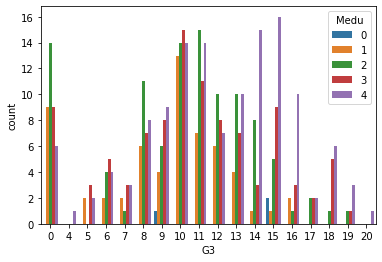

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "G3", hue="Medu", data = dfgrade);

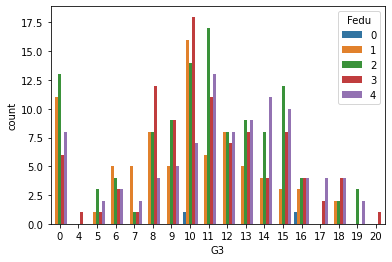

In [10]:
pd.crosstab(dfgrade["Fedu"], dfgrade["G3"], margins = True)
sns.countplot(x = "G3", hue="Fedu", data = dfgrade);

In [16]:

import pandas as pd


dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")
pd.crosstab(dfgrade["absences"], dfgrade["G3"], margins = True)







G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
absences,,,,,,,,,,,,,,,,,,,
0,38,0,0,1,1,6,4,12,6,10,4,6,15,4,3,3,2,0,115
1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,3
2,0,0,1,1,1,6,3,10,12,5,6,5,6,5,1,3,0,0,65
3,0,0,0,0,1,1,0,0,3,1,0,0,0,2,0,0,0,0,8
4,0,0,0,5,0,2,5,13,8,3,3,6,4,2,0,1,0,1,53
5,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,5
6,0,0,0,2,2,1,1,6,3,2,5,5,1,0,0,2,1,0,31
7,0,0,0,1,0,1,1,0,0,0,0,2,1,0,1,0,0,0,7
8,0,0,1,1,0,2,2,7,2,2,2,2,0,0,0,1,0,0,22


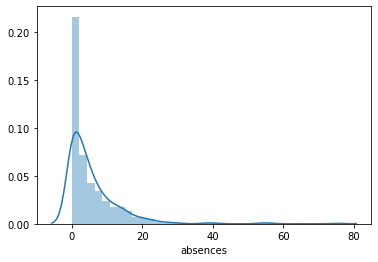

In [15]:
sns.distplot(dfgrade["absences"], kde=True);


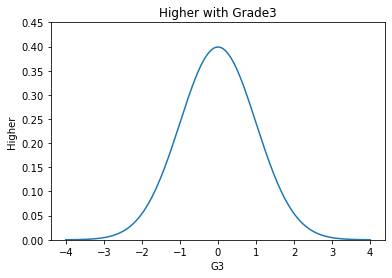

In [13]:
pd.crosstab(dfgrade["higher"], ["G3"], margins = True)
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title("Higher with Grade3")
ax.set_xlabel("G3")
ax.set_ylabel("Higher")
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()